In [2]:
import numpy as np
from scipy import stats

s = np.random.normal(size=1500)
b = np.arange(-4, 5)
h = np.histogram(s, bins=b, density=True)[0] 

In [3]:
bins = 0.5*(b[1:] + b[:-1])
pdf = stats.norm.pdf(bins)

In [4]:
loc, std = stats.norm.fit(s)
print(loc, std)

-0.012647143064636867 1.0261809658145815


In [5]:
import numpy as np
import pandas as pd

a1 = np.array([14.75, 18.5, 72.9, 35.7])
s1 = pd.Series(a1) 

In [6]:
type(s1)

pandas.core.series.Series

In [7]:
names = ['Greater London', 'Tokyo', 'Paris','New York']
population = [8663300, 9272565, 2229621,8491079]
area = [1572, 627, 105, 784] 

In [8]:
df = pd.DataFrame({'cities': names,'population': population,'area': area}) 

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.head(2)

,cities,population,area
0,Greater London,8663300,1572
1,Tokyo,9272565,627


In [11]:
df.tail(2)

,cities,population,area
2,Paris,2229621,105
3,New York,8491079,784


In [12]:
df.shape

(4, 3)

In [13]:
df.dtypes

cities        object
population     int64
area           int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cities      4 non-null      object
 1   population  4 non-null      int64 
 2   area        4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [16]:
df['area'] = df['area'].astype('float') 

In [17]:
df.columns

Index(['cities', 'population', 'area'], dtype='object')

In [18]:
df['population'][2:4]

2    2229621
3    8491079
Name: population, dtype: int64

In [19]:
df[['cities','area']][0:1]

,cities,area
0,Greater London,1572.0


In [20]:
df.set_index('cities', inplace=True)

In [21]:
df.loc['Tokyo']

population    9272565.0
area              627.0
Name: Tokyo, dtype: float64

In [22]:
df.loc['Greater London','population']

8663300

In [23]:
df.describe()

,population,area
count,4.000000e+00,4.000000
mean,7.164141e+06,772.000000
std,3.306720e+06,607.195191
min,2.229621e+06,105.000000
25%,6.925714e+06,496.500000
50%,8.577190e+06,705.500000
75%,8.815616e+06,981.000000
max,9.272565e+06,1572.000000


In [24]:
df['pop_density'] = df['population']/df['area'] 

In [25]:
import numpy as np
import pandas as pd

gla_cities = pd.read_csv('GLA_World_Cities_2016.csv')

In [26]:
gla_cities.head(3)

,City,Country,Population,Inland area in km2,Density in people per hectare,Dwellings,Density in dwellings per hectare,People per dwelling,Approx city radius km,Main topographical constraint,Constraint
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Greater London,England,"8,663,300","1,572",55.0,"3,454,490",22.0,2.5,23.0,Rivers,4%
2,Inner London,England,"3,439,700",319,108.0,"1,460,840",46.0,2.4,10.0,Rivers,5%


In [30]:
gla_cities.dropna(how='all', inplace=True)

In [31]:
gla_cities.shape

(17, 11)

In [32]:
#The contiuation of Lecture 10 are as followed:

renamecols = {'Inland area in km2': 'Area km2'}
gla_cities.rename(columns=renamecols,
                  inplace=True) 

In [33]:
gla_cities.columns

Index(['City', 'Country', 'Population', 'Area km2',
       'Density in people per hectare', 'Dwellings',
       'Density in dwellings per hectare', 'People per dwelling',
       'Approx city radius km', 'Main topographical constraint', 'Constraint'],
      dtype='object')

In [34]:
gla_cities['pop_density'] = \
gla_cities['Population']/gla_cities['Area km2'] 

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [35]:
gla_cities['Population']=gla_cities['Population'].\
str.replace(',','').astype(float) 

In [36]:
gla_cities['Area km2']=gla_cities['Area km2'].\
str.replace(',', '').astype(float)

gla_cities['Dwellings']=gla_cities['Dwellings'].\
str.replace(',', '').astype(float) 

In [37]:
gla_cities['pop_density'] = \
gla_cities['Population']/gla_cities['Area km2']
gla_cities['pop_density'].head(3) 

1     5511.005089
2    10782.758621
3     4165.470494
Name: pop_density, dtype: float64

In [45]:
gla_cities['Population (M)'] = gla_cities['Population']/1000000 

In [46]:
def city_size(x):
    if x < 1.5:
        s = 'Small'
    elif 1.5 <= x < 3:
        s = 'Medium'
    elif 3 <= x < 5:
        s = 'Large'
    else:
        s = 'Mega'
    return s

In [47]:
gla_cities['City Size'] = \
gla_cities['Population (M)'].apply(city_size)

In [48]:
gla_cities[gla_cities['City Size']=='Small'] 

,City,Country,Population,Area km2,Density in people per hectare,Dwellings,Density in dwellings per hectare,People per dwelling,Approx city radius km,Main topographical constraint,Constraint,pop_density,Population (M),City Size
5,Lyon,France,500715.0,48.0,105.0,265599.0,55.0,1.9,7.0,Rivers,5%,10431.562500,0.500715,Small
9,Sevilla,Spain,693878.0,141.0,49.0,268435.0,19.0,2.6,7.0,Rivers,3%,4921.120567,0.693878,Small
12,Boston,United States,617594.0,125.0,49.0,272481.0,22.0,2.3,6.0,Coast,30%,4940.752000,0.617594,Small


In [51]:
gla_cities[['City', 'Population (M)']] \
    [gla_cities['Population (M)']>8] 

,City,Population (M)
1,Greater London,8.663300
10,New York (City),8.491079
16,Tokyo (Special Wards Area),9.272565


In [52]:
gla_grouped = gla_cities.groupby('City Size')

In [53]:
gla_grouped.size() 

City Size
Large     4
Medium    5
Mega      5
Small     3
dtype: int64

In [54]:
gla_grouped['Population (M)'].mean() 

City Size
Large     3.488562
Medium    2.324692
Mega      7.625415
Small     0.604062
Name: Population (M), dtype: float64

In [55]:
gla_grouped['Population (M)'].agg([np.mean,np.std]) 

,mean,std
City Size,,
Large,3.488562,0.313245
Medium,2.324692,0.453616
Mega,7.625415,1.705035
Small,0.604062,0.097290


<AxesSubplot:ylabel='City Size'>

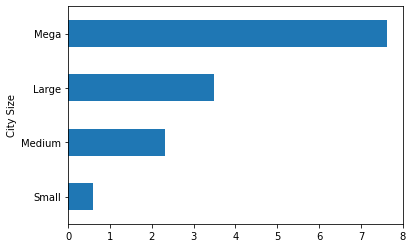

In [69]:
gla_grouped['Population (M)'].mean().\
 sort_values(ascending=True).plot.barh()